In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display_latex, display

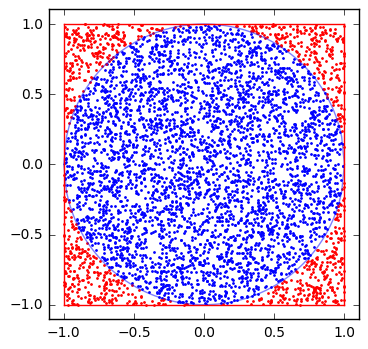

In [5]:
def est_pi(size):
    pts = np.random.uniform(-1,1,size=(size, 2))
    inside = pts[:,0]**2 + pts[:,1]**2 < 1
    pi = round(float(sum(inside)) / size * 4, 3)     
    return pi, pts

pts = est_pi(5000)[1]
inside = pts[:,0]**2 + pts[:,1]**2 < 1
x = np.linspace(-1,1,100)
y = (1-x**2)**0.5

plt.plot(x, y, color='blue', alpha=0.5)
plt.plot(x, -y, color='blue', alpha=0.5)
plt.plot(x, np.ones_like(x), color='red')
plt.plot(x, np.ones_like(x)*-1, color='red')
plt.plot(np.ones_like(x), x, color='red')
plt.plot(np.ones_like(x)*-1, x, color='red')
plt.margins(.005)
plt.gca().set_aspect('equal')

plt.scatter(pts[inside][:,0], pts[inside][:,1], color='blue', s=1)
plt.scatter(pts[~inside][:,0], pts[~inside][:,1], color='red', s=1)

plt.show()

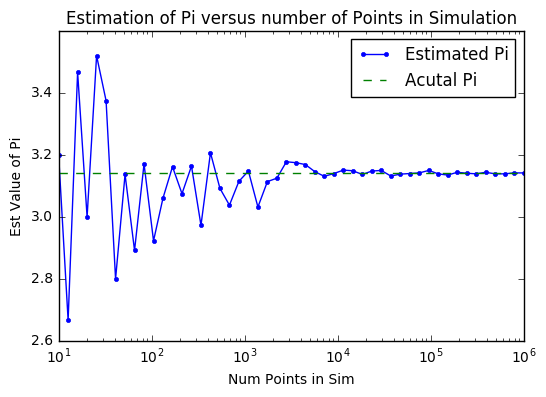

In [7]:
sizes = np.logspace(1,6,50)
x = []
y = []
for size in sizes:
    pi = est_pi(int(size))[0]
    x.append(size)
    y.append(pi)

plt.plot(x,y, linestyle='solid', marker='.', label='Estimated Pi')
pi = np.ones_like(x)*np.pi

plt.plot(x, pi, linestyle='dashed', label='Acutal Pi')
plt.xscale('log')
plt.legend()
plt.xlabel('Num Points in Sim')
plt.ylabel('Est Value of Pi')
plt.title('Estimation of Pi versus number of Points in Simulation')
plt.show()